In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

Generate Random Data 


In [2]:
category = ['Food','Travel','Fashion', 'Fitness', 'Music', 'Culture', 'Family', 'Health']

n = 500
data_range = pd.date_range(start='1/1/2019', periods=n)

category_data = [random.choice(category) for i in range(n)]

data = {
    'Date': data_range,
    'Category': category_data,
    'Like': np.random.randint(0, 1000, n)
}

print(data)




{'Date': DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08',
               '2020-05-09', '2020-05-10', '2020-05-11', '2020-05-12',
               '2020-05-13', '2020-05-14'],
              dtype='datetime64[ns]', length=500, freq='D'), 'Category': ['Culture', 'Health', 'Food', 'Food', 'Health', 'Culture', 'Fashion', 'Culture', 'Food', 'Culture', 'Travel', 'Fitness', 'Travel', 'Family', 'Food', 'Health', 'Music', 'Health', 'Fashion', 'Music', 'Music', 'Travel', 'Music', 'Family', 'Fitness', 'Music', 'Music', 'Family', 'Family', 'Fitness', 'Food', 'Fashion', 'Health', 'Food', 'Travel', 'Music', 'Food', 'Travel', 'Fitness', 'Music', 'Family', 'Fashion', 'Fitness', 'Family', 'Travel', 'Fitness', 'Travel', 'Family', 'Family', 'Travel', 'Fitness', 'Music', 'Family', 'Cult

Set my data into data frame using Pandas 

In [3]:
df = pd.DataFrame(data)
print(df.head(3))

print(df.info())

print(df.describe())

#get the count of total like 
total_like = df['Like'].sum()
print(total_like)

        Date Category  Like
0 2019-01-01  Culture   812
1 2019-01-02   Health   325
2 2019-01-03     Food   984
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Like      500 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 9.9+ KB
None
                      Date        Like
count                  500  500.000000
mean   2019-09-07 12:00:00  476.408000
min    2019-01-01 00:00:00    3.000000
25%    2019-05-05 18:00:00  200.750000
50%    2019-09-07 12:00:00  486.000000
75%    2020-01-10 06:00:00  728.750000
max    2020-05-14 00:00:00  999.000000
std                    NaN  301.491878
238204


In [4]:
#conevrt the date to datetime
df['Date'] = pd.to_datetime(df['Date'])
print(df.info())

#conver the like to int
df['Like'] = df['Like'].astype(int)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Like      500 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 9.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Like      500 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 9.9+ KB
None


In [5]:
print(df.isna().sum())
#remove all the null 
df = df.dropna()

Date        0
Category    0
Like        0
dtype: int64


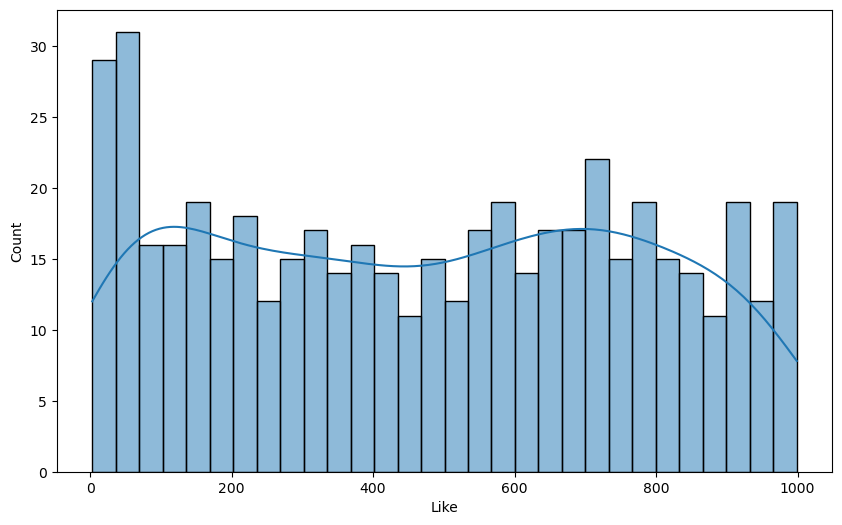

In [6]:
#visualisation on the likes 
plt.figure(figsize=(10, 6))
sns.histplot(df['Like'], bins=30, kde=True)
plt.show()


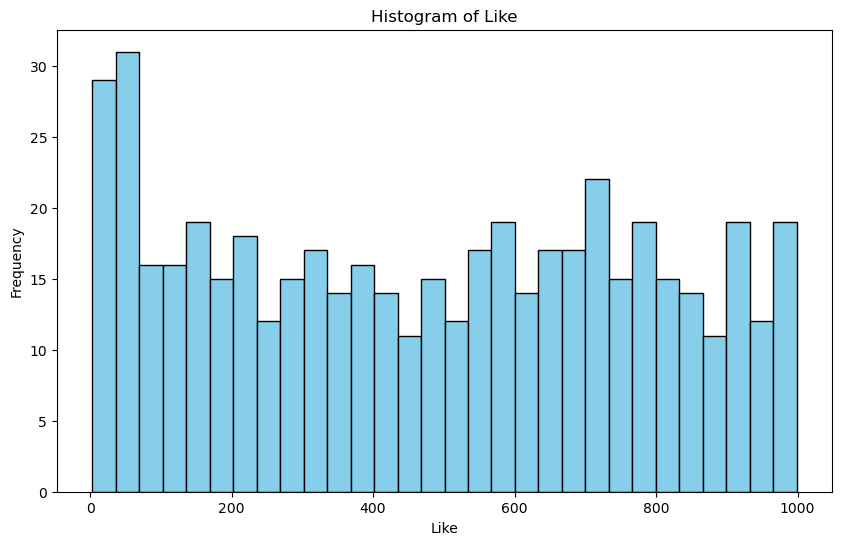

In [7]:
#histogram of like using matplotlib
plt.figure(figsize=(10, 6))
plt.hist(df['Like'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Like')
plt.ylabel('Frequency')
plt.title('Histogram of Like')  
plt.show()

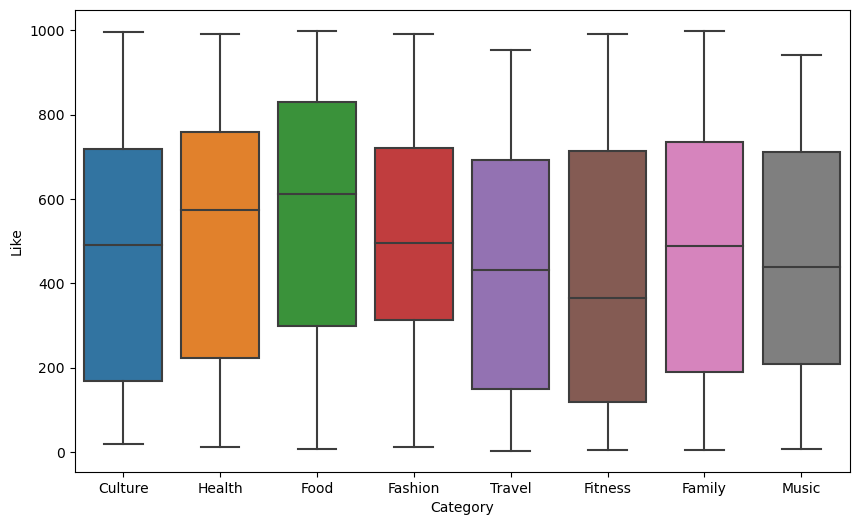

In [8]:
#boxplot for like
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Like', data=df)

plt.show()


In [9]:
print(df['Like'].mean())

group_by_category = df.groupby('Category')
print(group_by_category['Like'].mean())

476.408
Category
Culture    476.079365
Family     468.820513
Fashion    493.489796
Fitness    418.964912
Food       552.573333
Health     497.388889
Music      458.727273
Travel     431.086207
Name: Like, dtype: float64


Conclusion:
Base on the mean data calculated above, food category have the most 'Likes' in terms of average and the Travel have the lowest. But due to that the data are produced by random, my conclusion might not be correct. Base on the box plot, the most popular category is Food. The more likes they have the more popular is it and vice versa.